In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf

In [120]:
# Question 2
xbar = 29.1
mu = 31.9
sigma = 5.4
n = 35
z = (xbar-mu)/(sigma/np.sqrt(n))
print(z)

-3.067596924570168


In [121]:
# Question 3
z = 1.28
print(z)

alpha = 0.05

prob = stats.norm.cdf(z)

print(prob<alpha)

1.28
False


In [46]:
# QS 4: To test the hypothesis that eating fish makes one smarter, a random sample of 12 people take a fish oil supplement 
#for one year and then are given an IQ test...
X = [107, 96, 109, 117, 101, 114, 106, 111, 121, 97, 102, 92]
xbar = np.mean(X)
s = np.std(X,ddof=1)
mu0 = 100
n = len(X)
t = (xbar-mu0)/(s/np.sqrt(n))
print(t)

prob1 = stats.t.cdf(t,n-1)
print(prob1)
prob2 = 1-stats.t.cdf(t,n-1)
print(prob2)

alpha = 0.01

print(prob1<alpha)
print(prob2<alpha)

2.379272314287196
0.9817259588223158
0.018274041177684164
False
False


In [122]:
# Question 5

# Perform a two sample t-test to assess whether the drug affects weight loss. What do you conclude? (Use α=0.05 )
drug = [2, 6, 10, 19, 15, 3, 8, 9, 0, 7, 5, 12]
placebo = [5, 0, 4, 9, 1, 1, 2, 0, 6, 7]
ttest2 = stats.ttest_ind(drug,placebo)

print(ttest2)
print(ttest2.pvalue < 0.05)


Ttest_indResult(statistic=2.2920484527186096, pvalue=0.03288460058253379)
True


       Height     Weight
0  164.610260  71.672513
1  174.032874  84.532568
2  175.952944  91.761174
3  162.342934  76.132028
4  165.616526  56.789175
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     550.1
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           5.51e-42
Time:                        17:20:45   Log-Likelihood:                -318.69
No. Observations:                 100   AIC:                             641.4
Df Residuals:                      98   BIC:                             646.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      

Text(0, 0.5, 'Weight (kg)')

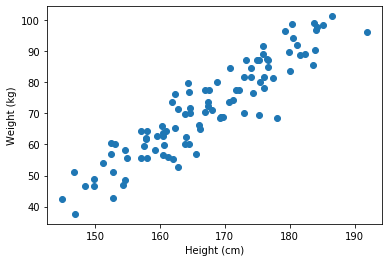

In [130]:
#QS 6 For the height versus weight data considered in the lab sheet, what is the slope of the fitted regression line?
#(Rounded to 2 decimal places)

df = pd.read_csv('height-weight.csv')
print(df.head())


model = smf.ols(formula='Weight~Height',data=df).fit()
print(model.summary())


plt.scatter(df.Height,df.Weight)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')

Text(0, 0.5, 'Residuals')

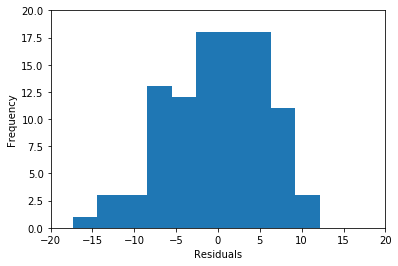

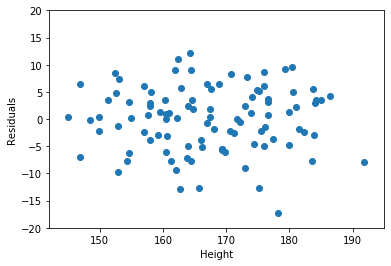

In [124]:
# QS 7

# For the height versus weight data considered in the lab sheet, does the spread of the residuals depend on height? 
residuals = model.resid
plt.figure()
plt.hist(residuals)
plt.axis([-20,20,0,20])
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.figure()
plt.scatter(df.Height,residuals)
plt.axis([142,195,-20,20])
plt.xlabel('Height')
plt.ylabel('Residuals')

In [131]:
# Question 8 

# For the height versus weight data considered in the lab sheet, use the fitted regression line to predict the weight 
#of someone who is 176cm. (Rounded to 2 decimal places)

grades  = pd.DataFrame({'Weight':df.Weight,'Height':df.Height})


pred62 = model.predict({'Height':176})
print("%.2f" % pred62)

83.15


   MPG   Price
0   19   88900
1   19   88900
2   19  136900
3   19   98700
4   19   98800
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     227.5
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           3.79e-39
Time:                        17:21:21   Log-Likelihood:                -3628.7
No. Observations:                 320   AIC:                             7261.
Df Residuals:                     318   BIC:                             7269.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Text(0, 0.5, 'MPG')

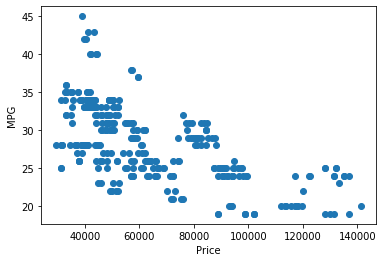

In [132]:
# Question 12: For the cars dataset, what is the coefficient of determination for the linear regression model? 
#(Rounded to 3 decimal places)

df = pd.read_csv('cars.csv')
print(df.head())


model = smf.ols(formula='Price~MPG',data=df).fit()
print(model.summary())


plt.scatter(df.Price,df.MPG)
plt.xlabel('Price')
plt.ylabel('MPG')

   MPG   Price
0   19   88900
1   19   88900
2   19  136900
3   19   98700
4   19   98800


Text(0, 0.5, 'Price')

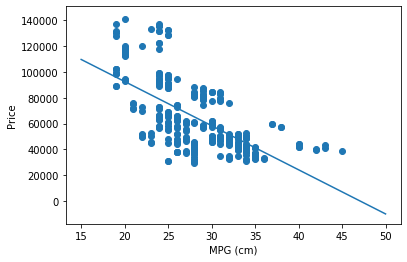

In [133]:
# Question 9: For the cars dataset, is the relationship approximately linear?
df = pd.read_csv('cars.csv')
print(df.head())

xrange = np.linspace(15,50,100)
plt.plot(xrange,model.params.Intercept+model.params.MPG*xrange)
plt.scatter(df.MPG,df.Price)
plt.xlabel('MPG (cm)')
plt.ylabel('Price')

1.0822986951097846e-11


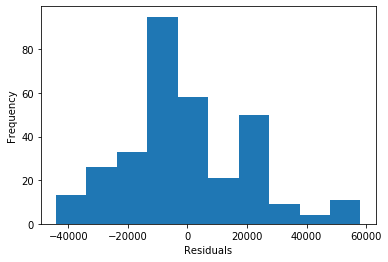

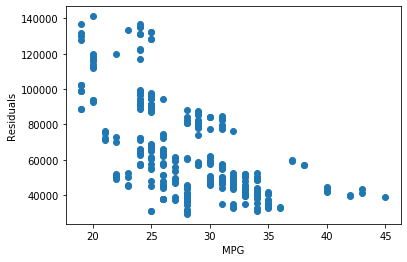

In [134]:
# QS 10

# For the cars dataset, do the residuals have a mean of roughly zero?

residuals = model.resid
plt.figure()
plt.hist(residuals)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.figure()
plt.scatter(df.MPG,df.Price)
plt.xlabel('MPG')
plt.ylabel('Residuals')

print(np.mean(model.resid))

In [139]:
# QS 11 For the cars dataset, can we use the fitted regression line to predict the recommended retail price of a car whose 
# miles per gallon is 12?
data  = pd.DataFrame({'Price':df.Price,'MPG':df.MPG})

pred62 = model.predict({'MPG':12})
print(pred62)

# no 12 is outside the range of data (19-45) and we can only make a prediction if the value is within the range of 
#data

0    119835.276673
dtype: float64
